In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

In [3]:
w1 = 3 
w0 = 4 
n = 100 

X = 10 * np.random.rand(n, )
y = w0 + w1 * X + np.random.randn(n, )

In [4]:
print('shape of the training data feature matrix : ', X.shape )
print('shape of the label vector : ', y.shape)

shape of the training data feature matrix :  (100,)
shape of the label vector :  (100,)


In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

In [6]:
print('Shape of x train : ', x_train.shape)
print('Shape of x test : ', x_test.shape)
print('Shape of y train : ', y_train.shape)
print('Shape of y test : ', y_test.shape)

Shape of x train :  (80,)
Shape of x test :  (20,)
Shape of y train :  (80,)
Shape of y test :  (20,)


In [7]:
x_train[:5]

array([6.98710396, 6.75493571, 2.76271859, 5.31280431, 3.41387756])

In [8]:
y_train[:5]

array([25.69145822, 23.39673505, 14.9673195 , 18.80278778, 13.41040254])

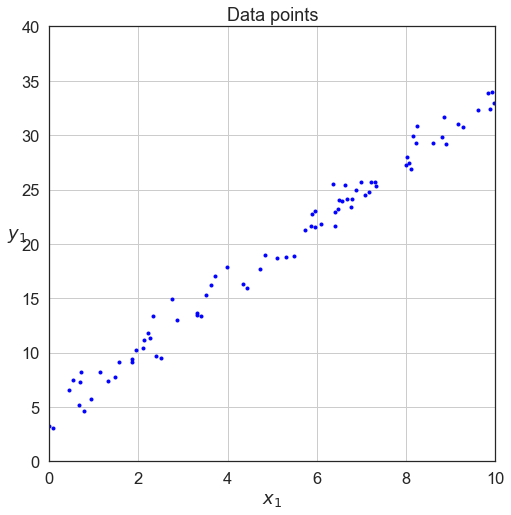

In [9]:
sns.set_style('white')
f = plt.figure(figsize=(8, 8))
sns.set_context('notebook', font_scale=1.5, rc ={'lines.linewidth' : 2.5})

plt.plot(x_train, y_train, "b.")
plt.title('Data points')
plt.grid(True)
plt.xlabel('$x_1$', fontsize = 18)
plt.ylabel('$y_1$', rotation = 0, fontsize = 18)
plt.axis([0, 10, 0, 40])

plt.show()

In [10]:
def add_dummy_feature(x) : 
    return np.column_stack((np.ones(x.shape[0]), x))

In [11]:
import unittest 

class TestAddDummyFeature(unittest.TestCase) : 
    def test_add_dummy_feature(self) : 
        train_matrix = np.array([[3, 2, 5], [9, 4, 7]])
        train_matrix_with_dummy_feature = add_dummy_feature(train_matrix)

        self.assertEqual(train_matrix_with_dummy_feature.shape, (2, 4))

        np.testing.assert_array_equal(
            train_matrix_with_dummy_feature, 
            np.array([[1, 3, 2, 5], [1, 9, 4, 7]])
        )

unittest.main(argv= [''], defaultTest = 'TestAddDummyFeature', verbosity = 2, exit = False)

test_add_dummy_feature (__main__.TestAddDummyFeature) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.001s

OK


In [12]:
print('before adding dummy feature : \n', x_train[:5])
x_train_with_dummy = add_dummy_feature(x_train)
print('after adding dummy feature : \n', x_train_with_dummy[:5])

before adding dummy feature : 
 [6.98710396 6.75493571 2.76271859 5.31280431 3.41387756]
after adding dummy feature : 
 [[1.         6.98710396]
 [1.         6.75493571]
 [1.         2.76271859]
 [1.         5.31280431]
 [1.         3.41387756]]


In [13]:
def predict(X, w) : 
    # X --> (n, m+1)
    # w --> (m+1, n)
    assert X.shape[-1] == w.shape[0]
    return X@w #matrix multiplication

In [14]:
w = np.random.rand(2, )

In [15]:
y_hat = predict(add_dummy_feature(x_train), w)

In [16]:
def non_vectorized_predict(X, w) : 
    y = []
    for i in range(0, X.shape[0]) : 
        y_hat_i = 0
        for j in range(0, X.shape[1]) : 
            y_hat_i += X[i][j] * w[j]
        y.append(y_hat_i)
    return np.array(y)

In [17]:
import time 

start_time = time.time()
y_hat_vectorized = predict(add_dummy_feature(x_train), w) 
end_time = time.time()
print('time taken in vectorized form : %0.8f '%(end_time - start_time))

start_time = time.time()
y_hat_non_vectorized = non_vectorized_predict(add_dummy_feature(x_train), w) 
end_time = time.time()
print('time taken in non vectorized form : %0.8f '%(end_time - start_time))

np.testing.assert_array_equal(y_hat_vectorized, y_hat_non_vectorized)

time taken in vectorized form : 0.00029159 
time taken in non vectorized form : 0.00070500 


In [18]:
w1 = 3 
w0 = 4 
n = 10000

X = 10 * np.random.rand(n, )
y = w0 + w1 * X + np.random.randn(n, )

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

start_time = time.time()
y_hat_vectorized = predict(add_dummy_feature(x_train), w) 
end_time = time.time()
print('time taken in vectorized form : %0.8f '%(end_time - start_time))

start_time = time.time()
y_hat_non_vectorized = non_vectorized_predict(add_dummy_feature(x_train), w) 
end_time = time.time()
print('time taken in non vectorized form : %0.8f '%(end_time - start_time))

np.testing.assert_array_equal(y_hat_vectorized, y_hat_non_vectorized)

time taken in vectorized form : 0.00098705 
time taken in non vectorized form : 0.01516962 


In [19]:
def loss(X, y, w) : 
    e = predict(X, w) - y 
    return (1/2) * (np.transpose(e) @ e)

In [74]:
def generate_data(n) :
    w1 = 3 
    w0 = 4 

    X = 10*np.random.rand(n,)
    y = w0 + w1 * X + np.random.rand(n,)
    return X, y

In [75]:
def normal_equation(X, y) : 
    return np.linalg.pinv(X) @ y

In [76]:
def calculate_gradient(X, y, w) : 
    return np.transpose(X)@(predict(X, w) - y)

In [77]:
def update_weight(w, grad, lr) : 
    return (w - lr*grad)

In [78]:
def gradient_descent(X:np.ndarray, y:np.ndarray, lr:float, num_epochs:int) : 
    w_all = []
    err_all = []
    w = np.zeros(X.shape[1])
    print()
    for i in np.arange(0, num_epochs) : 
        w_all.append(w)
        err_all.append(loss(X, y, w))

        dJdW = calculate_gradient(X, y, w)
        if (i%100) == 0 : 
            print('iteration #: %d, loss: %4.2f'%(i, err_all[-1]))

        w = update_weight(w, dJdW, lr)

    return w, err_all, w_all

In [112]:
X, y = generate_data(100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [125]:
class TestGradientDescent(unittest.TestCase) : 
    def test_gradient_descent(self) : 
        
        feature_matrix = add_dummy_feature(X_train)
        label_vector = y_train 

        w, err_all, w_all = gradient_descent(feature_matrix, label_vector, lr = 0.0001, num_epochs= 2000)

        self.assertEqual(w.shape, (2, ))

unittest.main(argv= [''], defaultTest = 'TestGradientDescent', verbosity = 2, exit = False)

test_gradient_descent (__main__.TestGradientDescent) ... 


iteration #: 0, loss: 16950.79
iteration #: 100, loss: 110.21
iteration #: 200, loss: 74.63
iteration #: 300, loss: 50.89
iteration #: 400, loss: 35.05
iteration #: 500, loss: 24.49
iteration #: 600, loss: 17.45
iteration #: 700, loss: 12.75
iteration #: 800, loss: 9.61
iteration #: 900, loss: 7.52
iteration #: 1000, loss: 6.13
iteration #: 1100, loss: 5.20
iteration #: 1200, loss: 4.58
iteration #: 1300, loss: 4.16
iteration #: 1400, loss: 3.89
iteration #: 1500, loss: 3.70
iteration #: 1600, loss: 3.58
iteration #: 1700, loss: 3.50
iteration #: 1800, loss: 3.44
iteration #: 1900, loss: 3.41


ok

----------------------------------------------------------------------
Ran 1 test in 0.053s

OK


In [126]:
w, err_all, w_all = gradient_descent(add_dummy_feature(X_train), y_train, lr = 0.0001, num_epochs= 2000)


iteration #: 0, loss: 16950.79
iteration #: 100, loss: 110.21
iteration #: 200, loss: 74.63
iteration #: 300, loss: 50.89
iteration #: 400, loss: 35.05
iteration #: 500, loss: 24.49
iteration #: 600, loss: 17.45
iteration #: 700, loss: 12.75
iteration #: 800, loss: 9.61
iteration #: 900, loss: 7.52
iteration #: 1000, loss: 6.13
iteration #: 1100, loss: 5.20
iteration #: 1200, loss: 4.58
iteration #: 1300, loss: 4.16
iteration #: 1400, loss: 3.89
iteration #: 1500, loss: 3.70
iteration #: 1600, loss: 3.58
iteration #: 1700, loss: 3.50
iteration #: 1800, loss: 3.44
iteration #: 1900, loss: 3.41


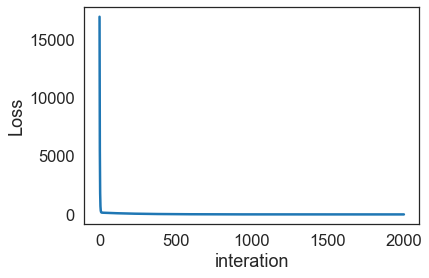

In [138]:
def plot_learning_curves(err_all) : 
    plt.plot(err_all)
    plt.xlabel('interation')
    plt.ylabel('Loss')

plot_learning_curves(err_all)


iteration #: 0, loss: 16950.79
iteration #: 100, loss: 10338.52
iteration #: 200, loss: 6330.23
iteration #: 300, loss: 3900.35
iteration #: 400, loss: 2427.22
iteration #: 500, loss: 1534.04
iteration #: 600, loss: 992.38
iteration #: 700, loss: 663.81
iteration #: 800, loss: 464.40
iteration #: 900, loss: 343.28
iteration #: 1000, loss: 269.62
iteration #: 1100, loss: 224.73
iteration #: 1200, loss: 197.28
iteration #: 1300, loss: 180.39
iteration #: 1400, loss: 169.92
iteration #: 1500, loss: 163.33
iteration #: 1600, loss: 159.10
iteration #: 1700, loss: 156.30
iteration #: 1800, loss: 154.36
iteration #: 1900, loss: 152.96


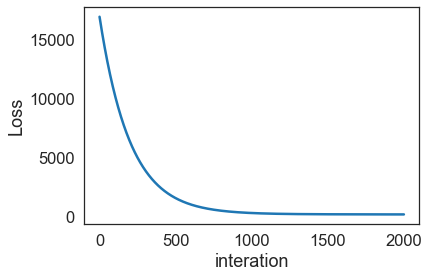

In [140]:
w, err_all, w_all = gradient_descent(add_dummy_feature(X_train), y_train, lr = 1e-6, num_epochs= 2000)
plot_learning_curves(err_all)


iteration #: 0, loss: 16950.79
iteration #: 100, loss: 110.21
iteration #: 200, loss: 74.63
iteration #: 300, loss: 50.89
iteration #: 400, loss: 35.05
iteration #: 500, loss: 24.49
iteration #: 600, loss: 17.45
iteration #: 700, loss: 12.75
iteration #: 800, loss: 9.61
iteration #: 900, loss: 7.52
iteration #: 1000, loss: 6.13
iteration #: 1100, loss: 5.20
iteration #: 1200, loss: 4.58
iteration #: 1300, loss: 4.16
iteration #: 1400, loss: 3.89
iteration #: 1500, loss: 3.70
iteration #: 1600, loss: 3.58
iteration #: 1700, loss: 3.50
iteration #: 1800, loss: 3.44
iteration #: 1900, loss: 3.41


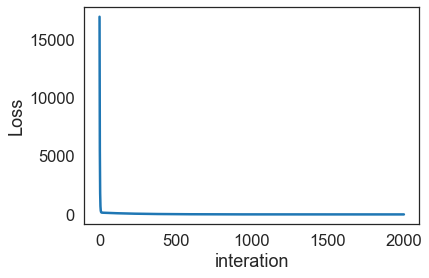

In [141]:
w, err_all, w_all = gradient_descent(add_dummy_feature(X_train), y_train, lr = 1e-4, num_epochs= 2000)
plot_learning_curves(err_all)


iteration #: 0, loss: 16950.79
iteration #: 100, loss:  inf
iteration #: 200, loss:  nan
iteration #: 300, loss:  nan
iteration #: 400, loss:  nan
iteration #: 500, loss:  nan
iteration #: 600, loss:  nan
iteration #: 700, loss:  nan
iteration #: 800, loss:  nan
iteration #: 900, loss:  nan
iteration #: 1000, loss:  nan
iteration #: 1100, loss:  nan
iteration #: 1200, loss:  nan
iteration #: 1300, loss:  nan
iteration #: 1400, loss:  nan
iteration #: 1500, loss:  nan
iteration #: 1600, loss:  nan
iteration #: 1700, loss:  nan
iteration #: 1800, loss:  nan
iteration #: 1900, loss:  nan


C:\Users\Computer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in matmul
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Computer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in matmul
  
C:\Users\Computer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in subtract
  


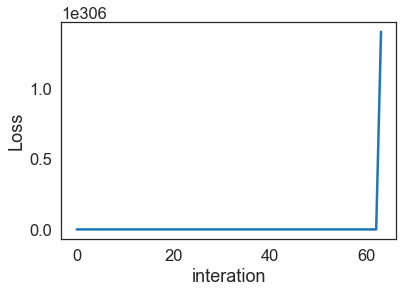

In [142]:
w, err_all, w_all = gradient_descent(add_dummy_feature(X_train), y_train, lr = 1e-1, num_epochs= 2000)
plot_learning_curves(err_all)